**Importing Necessary Libraries**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

**Dataset**

In [2]:
data = pd.read_csv('/content/classification project.csv')

In [3]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Data Cleaning**

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
data.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [8]:
m = ['dur','num_calls']
for i in m:
  iqr = data[i].quantile(0.75)-data[i].quantile(0.25)
  upper = data[i].quantile(0.75)+(1.5*iqr)
  lower = data[i].quantile(0.25)-(1.5*iqr)
  data[i] = data[i].clip(upper,lower)

In [9]:
data['target']= data['y'].map({'yes':1,'no':0})

**Exploratory Data Analysis**

<AxesSubplot:ylabel='job'>

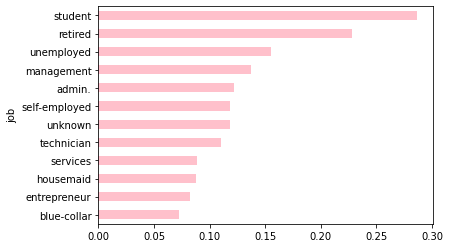

In [10]:
data.groupby(['job'])['target'].mean().sort_values().plot(kind='barh',color = 'pink')

<AxesSubplot:ylabel='marital'>

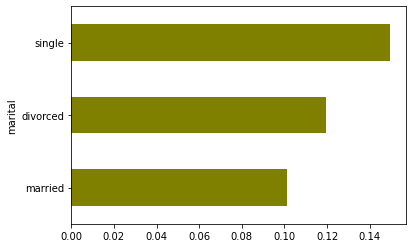

In [11]:
data.groupby(['marital'])['target'].mean().sort_values().plot(kind='barh',color = 'olive')

<AxesSubplot:ylabel='education_qual'>

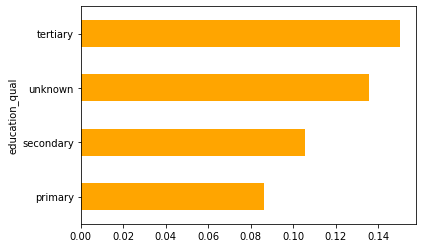

In [12]:
data.groupby(['education_qual'])['target'].mean().sort_values().plot(kind='barh',color = 'orange')

<AxesSubplot:ylabel='call_type'>

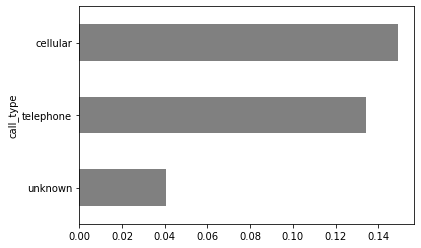

In [70]:
data.groupby(['call_type'])['target'].mean().sort_values().plot(kind='barh',color='grey')

<AxesSubplot:ylabel='mon'>

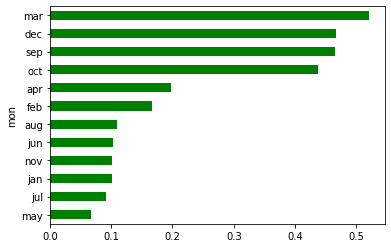

In [14]:
data.groupby(['mon'])['target'].mean().sort_values().plot(kind='barh',color = 'green')

<AxesSubplot:ylabel='prev_outcome'>

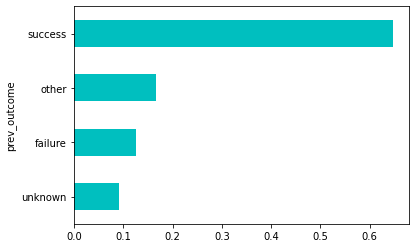

In [15]:
data.groupby(['prev_outcome'])['target'].mean().sort_values().plot(kind='barh',color = 'c')

**Data Encoding**

In [16]:
data['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
data.groupby(['job'])['target'].mean().sort_values(ascending = False)

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
unknown          0.118056
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.072765
Name: target, dtype: float64

In [18]:
data["job"] = data["job"].replace("unknown",data["job"].mode()[0])

In [19]:
data['encode_job']=data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

In [20]:
data['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [21]:
data.groupby(['marital'])['target'].mean().sort_values(ascending = False)

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: target, dtype: float64

In [22]:
data['encode_marital']= data['marital'].map({'married':0,'divorced':1,'single':2})

In [23]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [24]:
data["education_qual"] = data["education_qual"].replace("unknown",data["education_qual"].mode()[0])

In [25]:
data.groupby(['education_qual'])['target'].mean().sort_values(ascending = False)

education_qual
tertiary     0.150086
secondary    0.107838
primary      0.086277
Name: target, dtype: float64

In [26]:
data['encode_education'] = data['education_qual'].map({'primary':0,'secondary':1,'tertiary':2})

In [27]:
data['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [28]:
data.groupby(['call_type'])['target'].mean().sort_values(ascending = False)

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [29]:
data['encode_calltype'] = data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})

In [30]:
data.groupby(['mon'])['target'].mean().sort_values(ascending = False)

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: target, dtype: float64

In [31]:
data['encode_mon']= data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [32]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [33]:
data.groupby(['prev_outcome'])['target'].mean().sort_values(ascending=False)

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: target, dtype: float64

In [34]:
data['encode_pre'] = data['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [35]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,encode_job,encode_marital,encode_education,encode_calltype,encode_mon,encode_pre
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0,7,0,2,0,0,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0,4,2,1,0,0,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0,1,0,1,0,0,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0,0,0,1,0,0,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0,0,2,1,0,0,0


**Splitting of Dataset**

In [36]:
x = data.loc[:,['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre']].values
y = data.loc[:,'target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25)

**Balancing Dataset using SMOTEENN**

In [37]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train,y_train)

**Model : Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_smt,y_smt)

LogisticRegression()

In [39]:
LR_pred = LR.predict_proba(x_test)[:,1]

In [40]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,LR_pred)
score

0.873743202764977

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR.predict(x_test))

array([[7089, 2911],
       [ 164, 1138]])

**Model : KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_smt,y_smt)

KNeighborsClassifier()

In [43]:
knn_pred = knn.predict_proba(x_test)[:,1]
knn_score = roc_auc_score(y_test,knn_pred)
knn_score

0.8054518049155146

In [44]:
confusion_matrix(y_test, knn.predict(x_test))

array([[7529, 2471],
       [ 311,  991]])

**Model : Decision Tree**

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_smt,y_smt)

DecisionTreeClassifier()

In [72]:
DT_pred = DT.predict_proba(x_test)[:,1]
roc_auc_score(y_test,DT_pred)

0.802413594470046

In [47]:
confusion_matrix(y_test, DT.predict(x_test))

array([[8715, 1285],
       [ 325,  977]])

**Model : Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100,max_depth = 4,max_features = 'sqrt')
RF.fit(x_smt,y_smt)

RandomForestClassifier(max_depth=4)

In [49]:
RF_pred = RF.predict_proba(x_test)[:,1]
roc_auc_score(y_test,RF_pred)

0.8887583333333334

In [50]:
confusion_matrix(y_test, RF.predict(x_test))

array([[7388, 2612],
       [ 144, 1158]])

**Model : XGBoost**

In [51]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100,verbosity=0)
XGB.fit(x_smt,y_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
XGB_pred = XGB.predict_proba(x_test)[:,1]

In [53]:
roc_auc_score(y_test,XGB_pred)

0.921539861751152

In [54]:
confusion_matrix(y_test, XGB.predict(x_test))

array([[8917, 1083],
       [ 293, 1009]])

In [55]:
model = ['LR','KNN','DT','RF','XGB']
score = [roc_auc_score(y_test,LR_pred),roc_auc_score(y_test,knn_pred),roc_auc_score(y_test,DT_pred),roc_auc_score(y_test,RF_pred),roc_auc_score(y_test,XGB_pred)]

In [56]:
pd.DataFrame({'model':model,'score':score})

,model,score
0,LR,0.873743
1,KNN,0.805452
2,DT,0.821336
3,RF,0.888758
4,XGB,0.921540


**Hyper Parameter Tuning**

In [57]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
x = data.loc[:,['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre']].values
y = data.loc[:,'target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,stratify=y)
pipeline = imbpipeline(steps = [['smote', SMOTEENN()],['classifier', XGBClassifier(learning_rate=0.75)]])
stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True)
param_grid = {'classifier__C':[0.01,0.1,0.25,0.5,1]}
grid_search = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring='roc_auc',cv=stratified_kfold,n_jobs=-1)
grid_search.fit(x_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(x_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

[07:49:23] WARNING: ../src/learner.cc:767: 
Parameters: { "C", "max_iter" } are not used.

Cross-validation score: 0.923267240851613
Test score: 0.9254120570945219


**Feature Importance**

In [58]:
col = ['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre']

In [59]:
pd.DataFrame({'col':col,'xgb_imp':XGB.feature_importances_,'rf_imp':RF.feature_importances_,'dt_imp':DT.feature_importances_})

,col,xgb_imp,rf_imp,dt_imp
0,age,0.022535,0.006301,0.032220
1,encode_job,0.039075,0.017293,0.025505
2,encode_marital,0.057709,0.032131,0.008626
3,encode_education,0.098673,0.044586,0.007998
4,encode_calltype,0.168208,0.128166,0.073836
5,day,0.024104,0.001923,0.048693
6,encode_mon,0.119804,0.121177,0.205577
7,dur,0.262699,0.506044,0.479099
8,num_calls,0.057343,0.014687,0.015031
9,encode_pre,0.149851,0.127691,0.103414


In [63]:
a = data.loc[:,['encode_education','encode_calltype','encode_mon','dur','encode_pre']].values
b = data.loc[:,'target'].values
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.25)
a_smt, b_smt = smt.fit_resample(a_train,b_train)
XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
XGB.fit(a_smt,b_smt)
feature_XGB_pred = XGB.predict_proba(a_test)[:,1]
roc_auc_score(b_test,feature_XGB_pred)

0.9045617267879267

**Feature Combinations**

In [59]:
from itertools import combinations
comb_2 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],2))

In [65]:
c_2 = []
for i in range(len(comb_2)):
  m = data.loc[:,comb_2[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_2.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [66]:
c_2 = pd.Series(c_2)
c_2.nlargest(5)

39    0.854672
43    0.843482
14    0.821842
32    0.820130
6     0.812373
dtype: float64

In [67]:
comb_3 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],3))
c_3 = []
for i in range(len(comb_3)):
  m = data.loc[:,comb_3[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_3.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [68]:
c_3 = pd.Series(c_3)
c_3.nlargest(5)

110    0.879874
117    0.876769
30     0.870000
58     0.868892
104    0.864442
dtype: float64

In [69]:
comb_4 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],4))
c_4 = []
for i in range(len(comb_4)):
  m = data.loc[:,comb_4[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_4.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [70]:
c_4 = pd.Series(c_4)
c_4.nlargest(5)

206    0.912241
81     0.902122
202    0.900624
195    0.899755
130    0.894844
dtype: float64

In [71]:
comb_5 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],5))
c_5 = []
for i in range(len(comb_5)):
  m = data.loc[:,comb_5[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_5.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [72]:
c_5 = pd.Series(c_5)
c_5.nlargest(5)

247    0.918826
251    0.916710
111    0.915335
122    0.915032
238    0.913238
dtype: float64

In [73]:
comb_6 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],6))
c_6 = []
for i in range(len(comb_6)):
  m = data.loc[:,comb_6[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_6.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [74]:
c_6 = pd.Series(c_6)
c_6.nlargest(5)

177    0.928390
198    0.924769
121    0.922104
204    0.919855
125    0.918938
dtype: float64

In [60]:
comb_7 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],7))
c_7 = []
for i in range(len(comb_7)):
  m = data.loc[:,comb_7[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_7.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [61]:
c_7 = pd.Series(c_7)
c_7.nlargest(5)

78     0.924490
51     0.924058
100    0.923833
72     0.921735
111    0.921437
dtype: float64

In [66]:
comb_8 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],8))
c_8 = []
for i in range(len(comb_8)):
  m = data.loc[:,comb_8[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_8.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [67]:
c_8 = pd.Series(c_8)
c_8.nlargest(5)

29    0.924626
34    0.923176
22    0.923083
37    0.922888
44    0.921930
dtype: float64

In [68]:
comb_9 = list(combinations(['age','encode_job','encode_marital','encode_education','encode_calltype','day','encode_mon','dur','num_calls','encode_pre'],9))
c_9 = []
for i in range(len(comb_9)):
  m = data.loc[:,comb_9[i]].values
  n = data.loc[:,'target'].values
  m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.25)
  m_smt,n_smt = smt.fit_resample(m_train,n_train)
  XGB = XGBClassifier(learning_rate = 0.08,n_estimators=100,verbosity=0)
  XGB.fit(m_smt,n_smt)
  c_9.append(roc_auc_score(n_test,XGB.predict_proba(m_test)[:,1]))

In [69]:
c_9 = pd.Series(c_9)
c_9.nlargest(5)

7    0.924941
6    0.923687
1    0.922464
8    0.922108
9    0.921546
dtype: float64